In [1]:
# Import necessary extensions and modules
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import copy
import modules.Utility as util

# Create particle distribution to be used in all simulations
n_particles = 8836
max_property = 0 # property could be mass or charge 
box_size = 1000

# Generate initial particles
initial_positions=[]
line_n = int(np.sqrt(n_particles))
start_inset = box_size/(line_n+1)
for x in np.linspace(start_inset, box_size - start_inset, line_n, True):
    for y in np.linspace(start_inset, box_size - start_inset, line_n, True):
        initial_positions.append(np.array([x, y])) 
initial_positions = np.array(initial_positions)

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))

# Add a single particle with non-zero property
point = 500
charge = 1
initial_particles.append(Particle(np.array([point,point]), charge))



## Analytic Potential Graph

/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_triangulation.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  triangles = np.asarray(triangles, dtype=np.int32)
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z_check.max())
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z_check.min())
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:46: ComplexWarning: Casting complex values to real discar

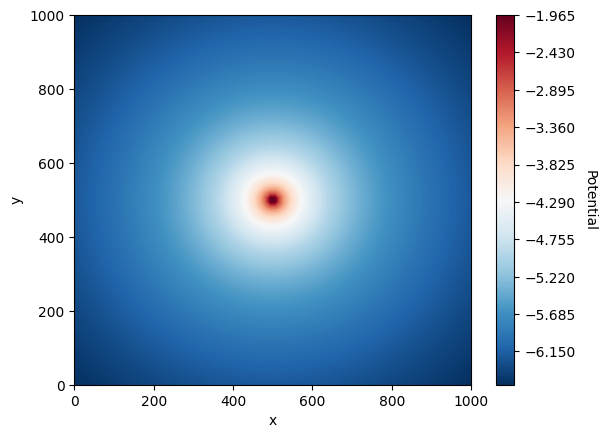

In [2]:
# Plot the analytic potential graph for this particle
analytic_simulation = SingleParticle([point, point], charge, box_size)
analytic_simulation.plot_potential()
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation.evaluate_particle_potentials(analytic_particles)

## FMM Potential Graph

In [3]:
# FMM Simulation
expansion_order = 10
n_levels = 5
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, fmm_particles, n_levels, p=expansion_order)
fmm_results = fmm_simulation.run(plotting = True, z_range = [None,0], x_range=[0,box_size], y_range=[0,box_size], z_levels=10000)

## Multipole Expansion About a Specified Meshbox
This is then also compared to the analytic result

Expected radius of convergence (at lowest level, for higher levels, should add z_0 as well) 176.7766952966369


/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/contour.py:1234: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg, np.float64)
/var/folders/kx/94yhyxhd7fz53_m_dcz_84nr0000gn/T/ipykernel_79512/1090206099.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  test_results = util.calc_potential_results(test_particles, fig = point_test_fig, ax = point_test_axs[0,1], z_range=[np.float64(analytic_results.min), 0], title = "MPE Result")
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Utility.py:51: RuntimeWarning: invalid value encountered in divide
  log_rel_errors = np.log10(np.abs(np.array(potential_differences) / np.array(reference_potentials)))


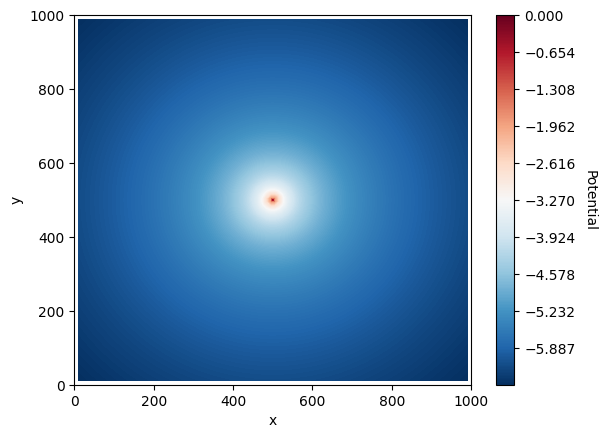

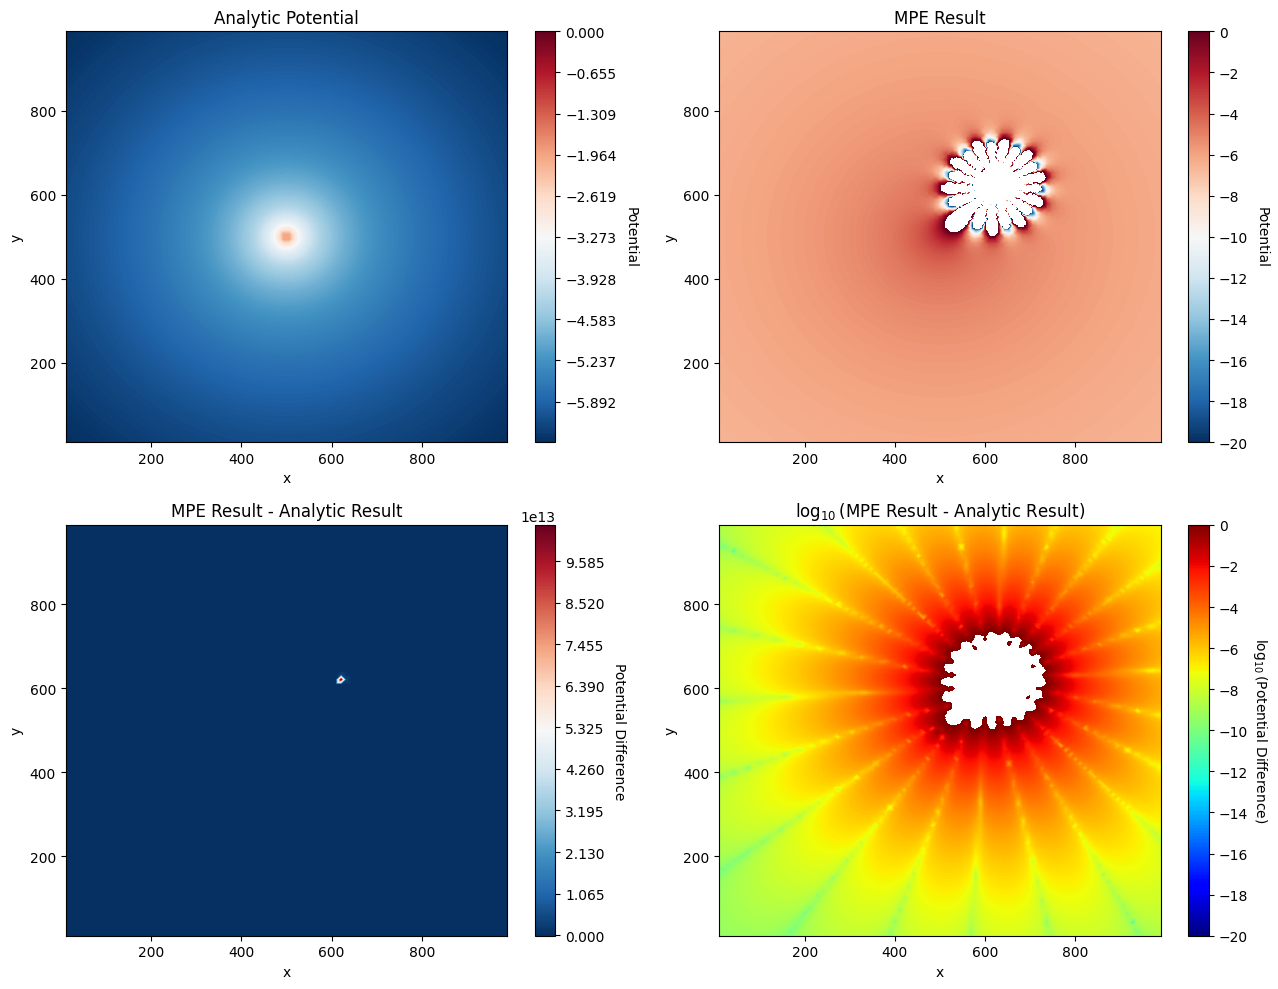

In [4]:
# Test the multipole expansion about a specified meshbox and
# Then compare this with the analytic result
test_particles = copy.deepcopy(initial_particles)
test_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
r = test_meshbox.width * np.sqrt(2)/2
print("Expected radius of convergence (at lowest level, for higher levels, should add z_0 as well)", r)
point_test = PointTesting(test_particles, test_meshbox, r)
point_test.test_mpe()
point_test_fig, point_test_axs = plt.subplots(2,2)
analytic_results = util.calc_potential_results(analytic_particles, fig = point_test_fig, ax = point_test_axs[0,0], 
                                               z_range=[None,0], title="Analytic Potential")
test_results = util.calc_potential_results(test_particles, fig = point_test_fig, ax = point_test_axs[0,1], 
                                           z_range=[np.float64(analytic_results.min), 0], title = "MPE Result")
test_analytic_diff_results = util.calc_difference_results(test_particles, analytic_particles, fig = point_test_fig, 
                                                          ax = point_test_axs[1,0], z_range=[None, None], 
                                                          title = "MPE Result - Analytic Result")
log_test_analytic_diff_results = util.calc_log_relative_error_results(test_particles, analytic_particles, 
                                                                      fig = point_test_fig, ax = point_test_axs[1,1],
                                                                      z_range=[-20,0], title = r"$\log_{10}(\text{MPE Result - Analytic Result})$")
point_test_fig.set_size_inches(13,10)
point_test_fig.tight_layout()


-5.382024341996948997


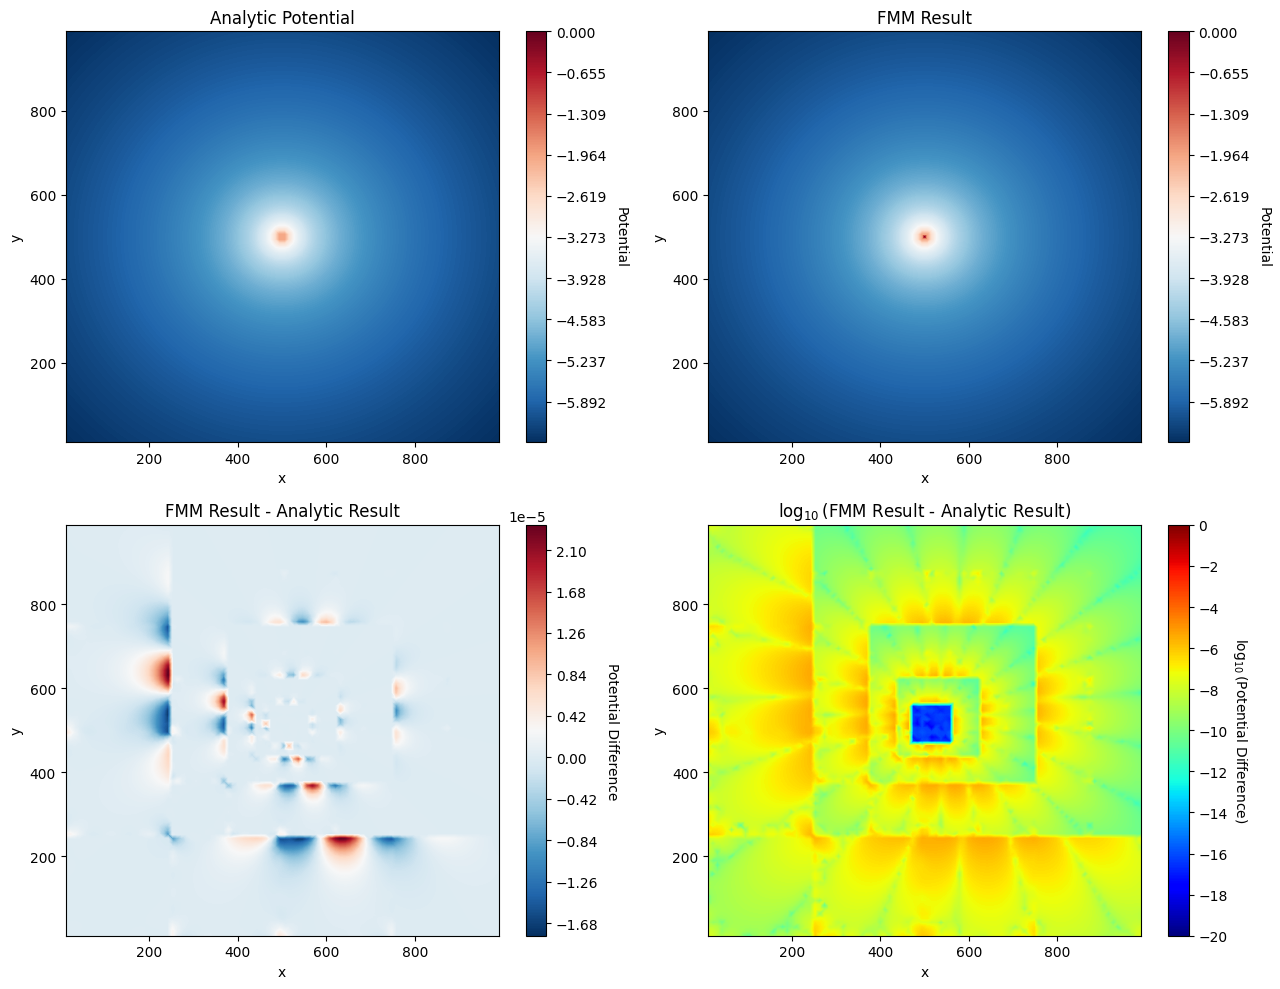

In [5]:
# Plot these same results for the full bh simulation potential prediction
fmm_fig, fmm_axs = plt.subplots(2,2)
analytic_results = util.calc_potential_results(analytic_particles, fig = fmm_fig, ax = fmm_axs[0,0], z_range=[None,0], title="Analytic Potential")
fmm_results = util.calc_potential_results(fmm_particles, fig = fmm_fig, ax = fmm_axs[0,1], z_range=[None, 0], title = "FMM Result")
fmm_analytic_diff_results = util.calc_difference_results(fmm_particles, analytic_particles, fig = fmm_fig, ax = fmm_axs[1,0], z_range=[None, None], 
                                                         title = "FMM Result - Analytic Result")
log_fmm_analytic_diff_results = util.calc_log_relative_error_results(fmm_particles, analytic_particles, fig = fmm_fig, ax = fmm_axs[1,1], z_range=[-20,0], 
                                                                     title = r"$\log_{10}(\text{FMM Result - Analytic Result})$")
fmm_fig.set_size_inches(13,10)
fmm_fig.tight_layout()
print(log_fmm_analytic_diff_results.max)

p= 0
p= 1
p= 4
p= 7
p= 10
p= 13
p= 16
p= 19
p= 22
p= 25
p= 28
p= 31


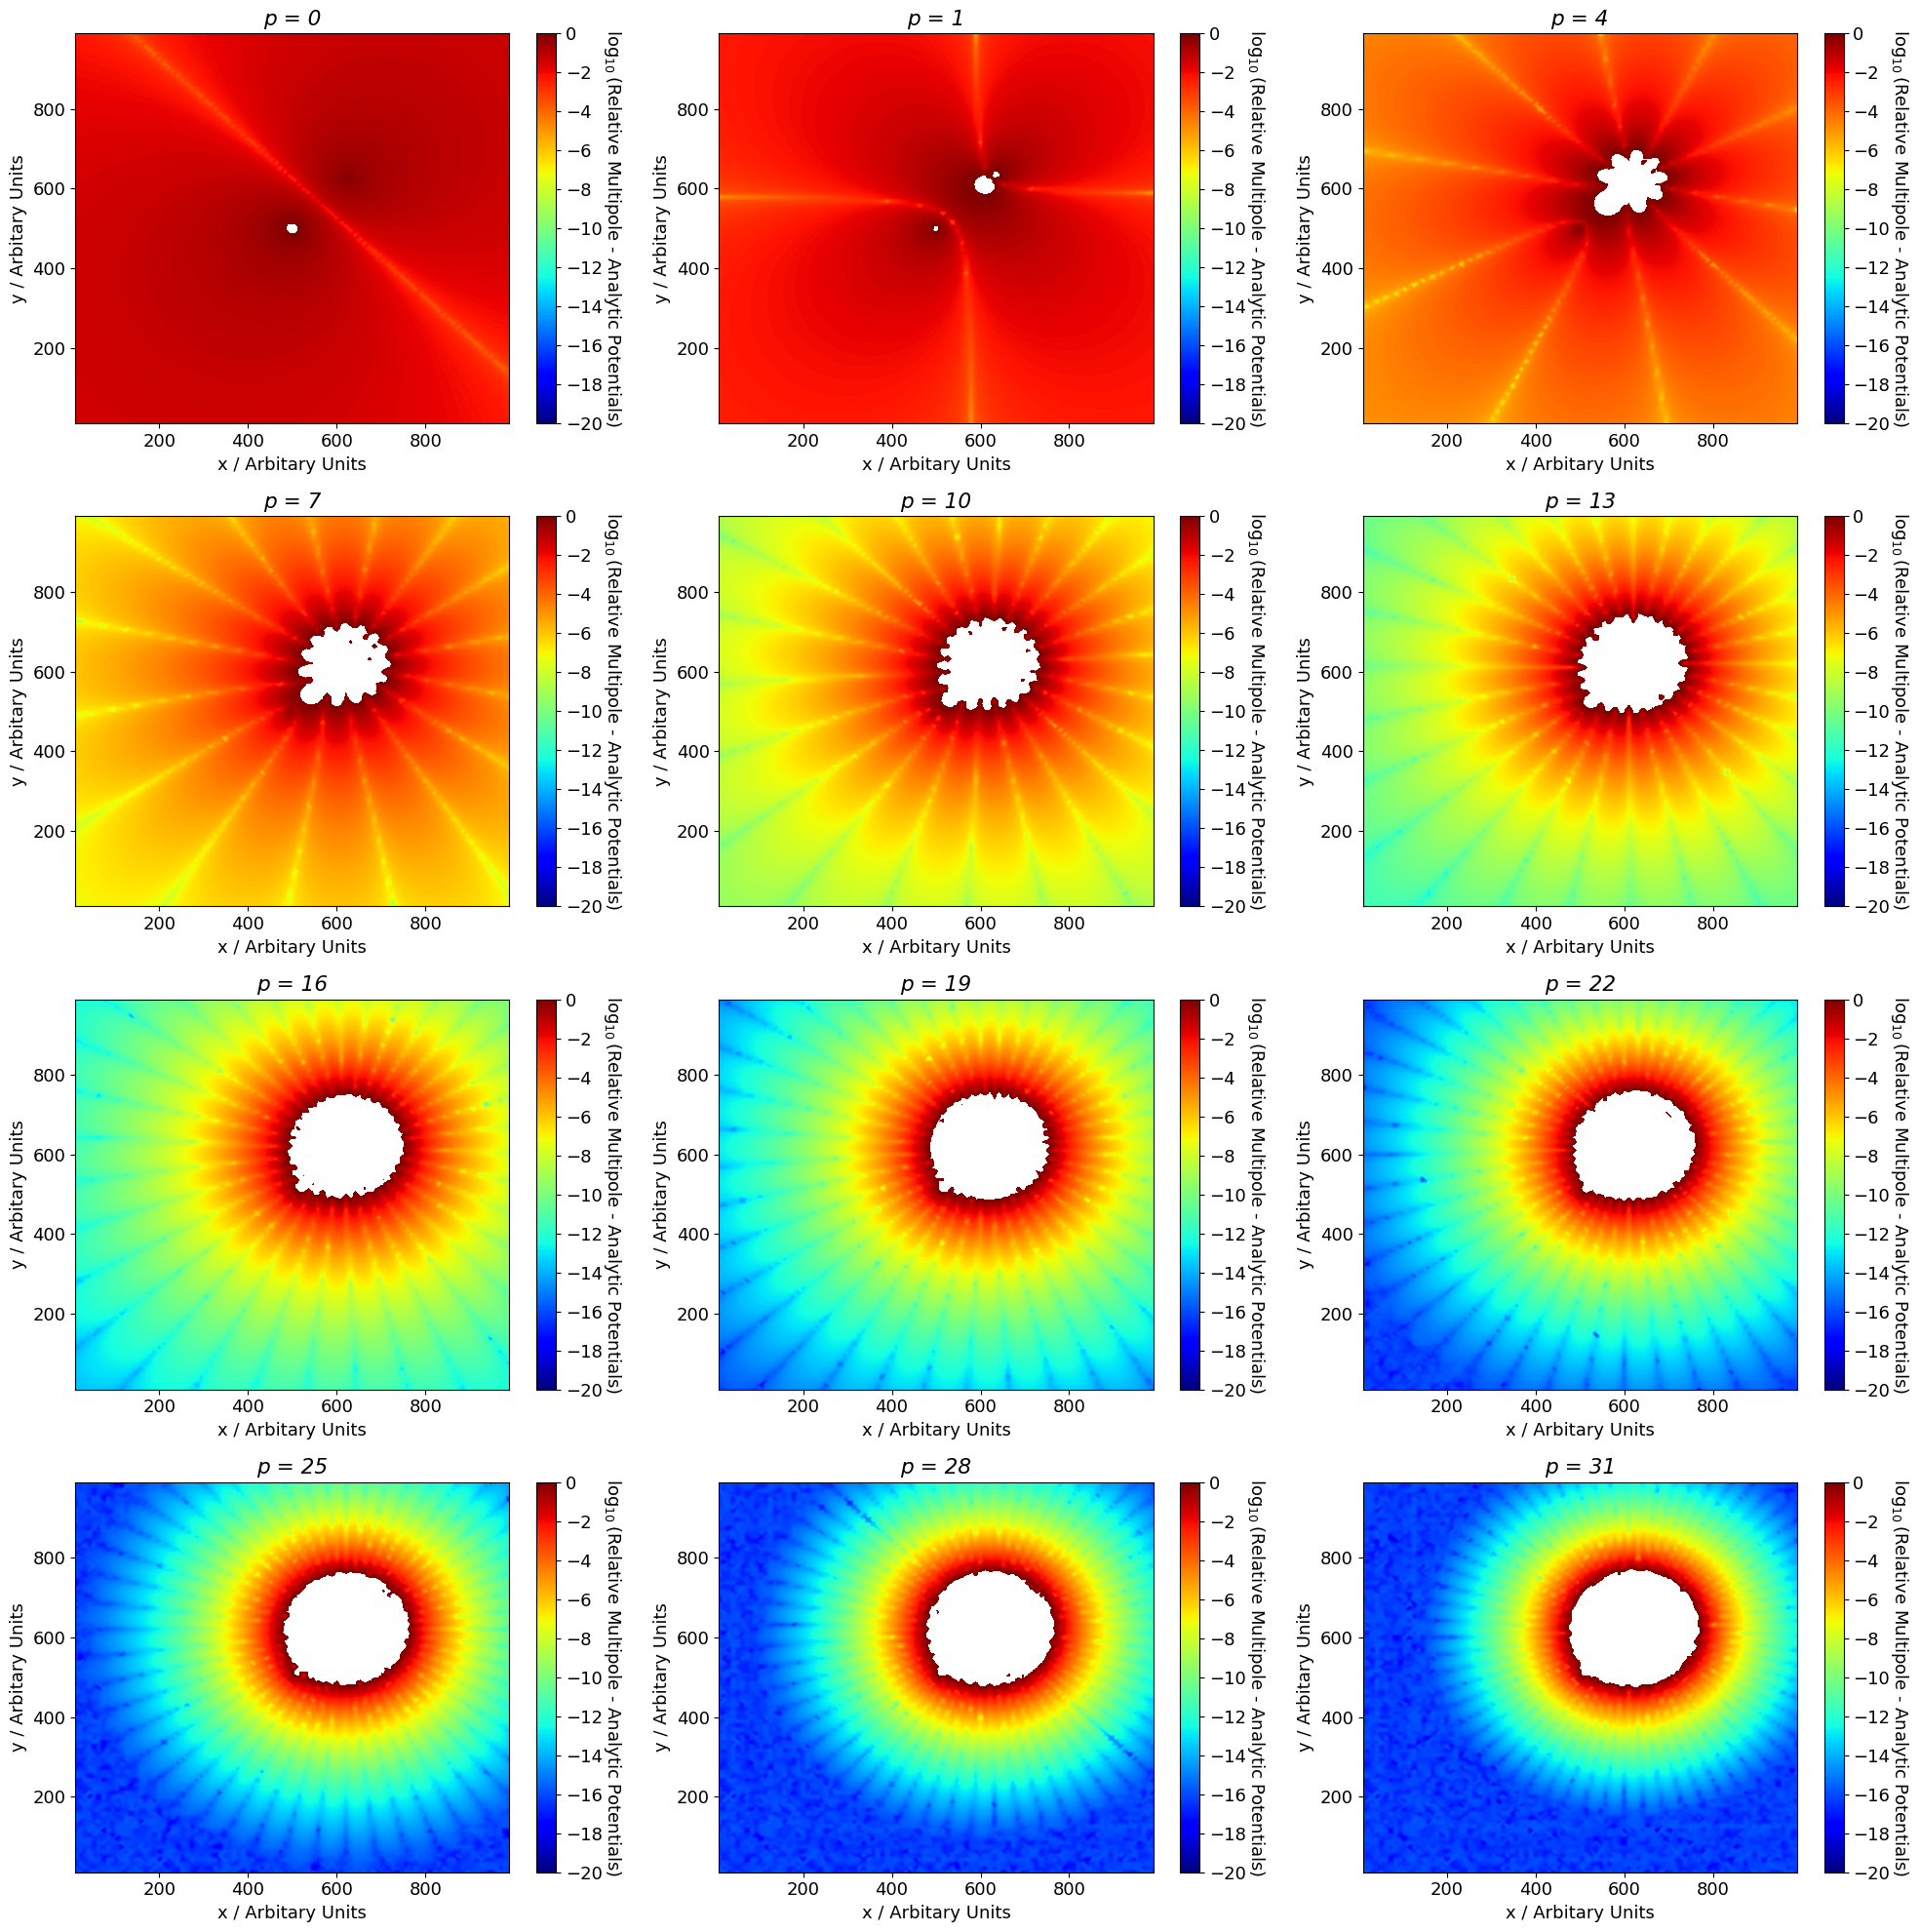

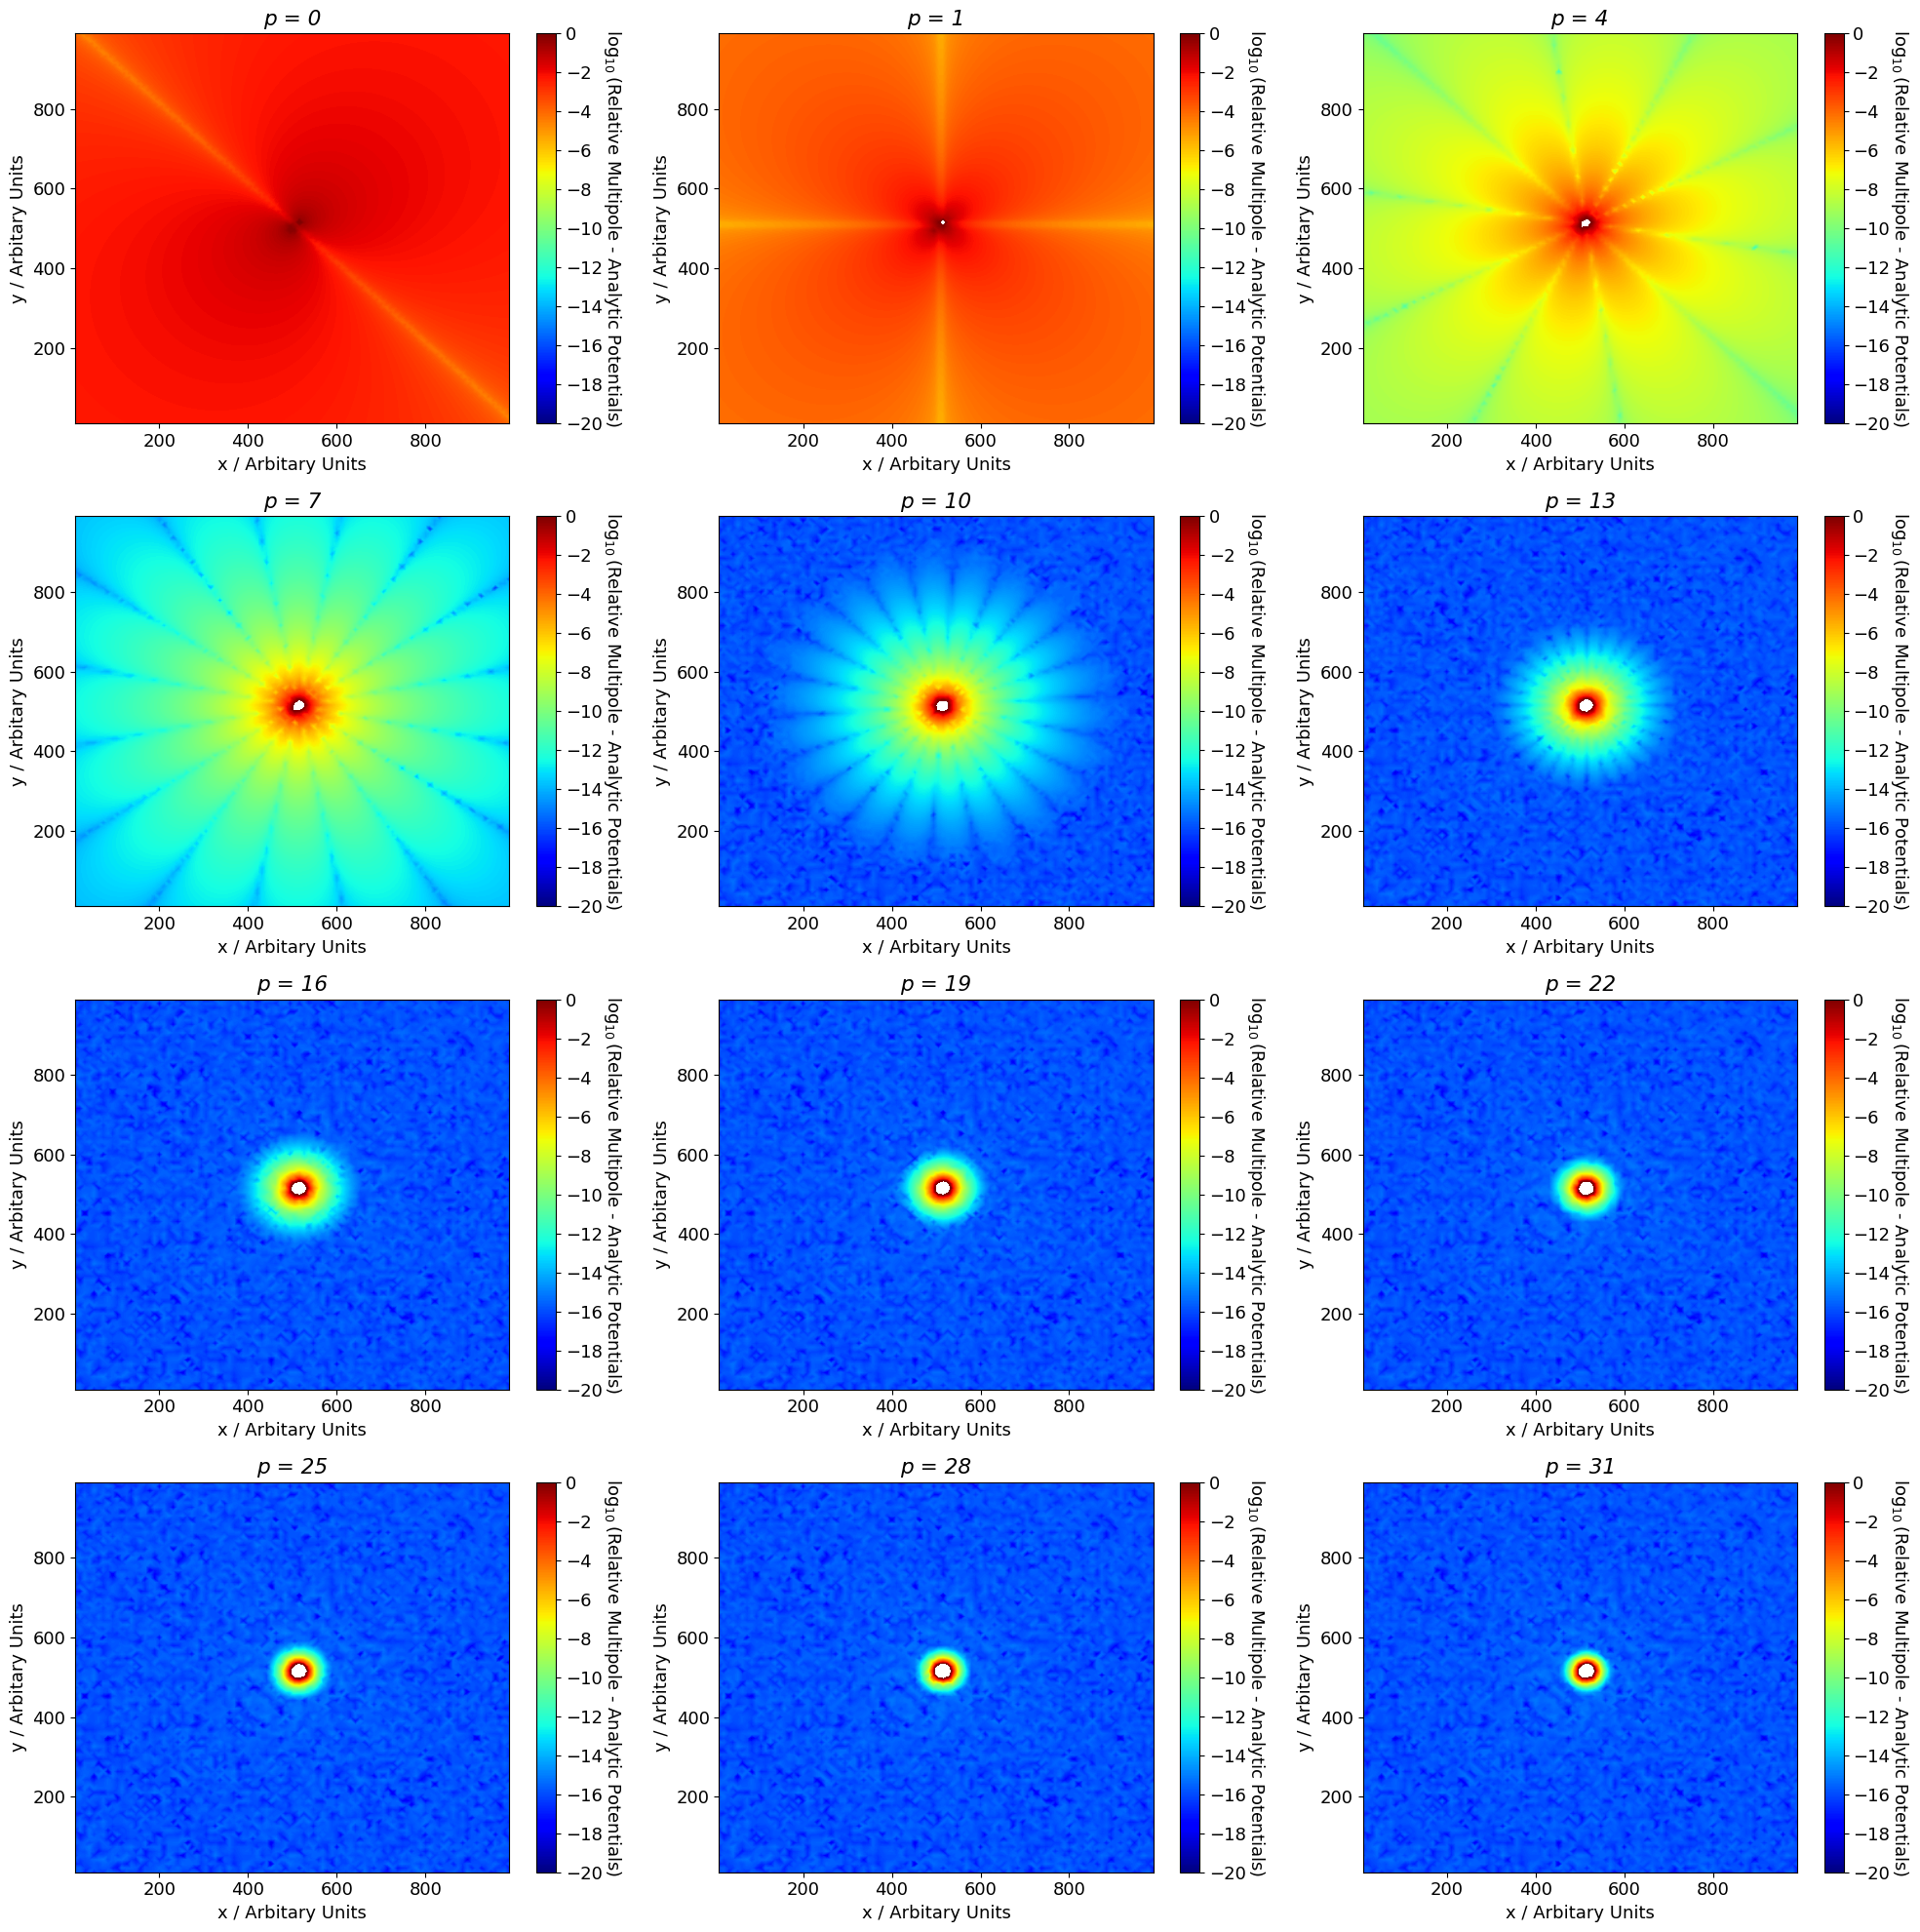

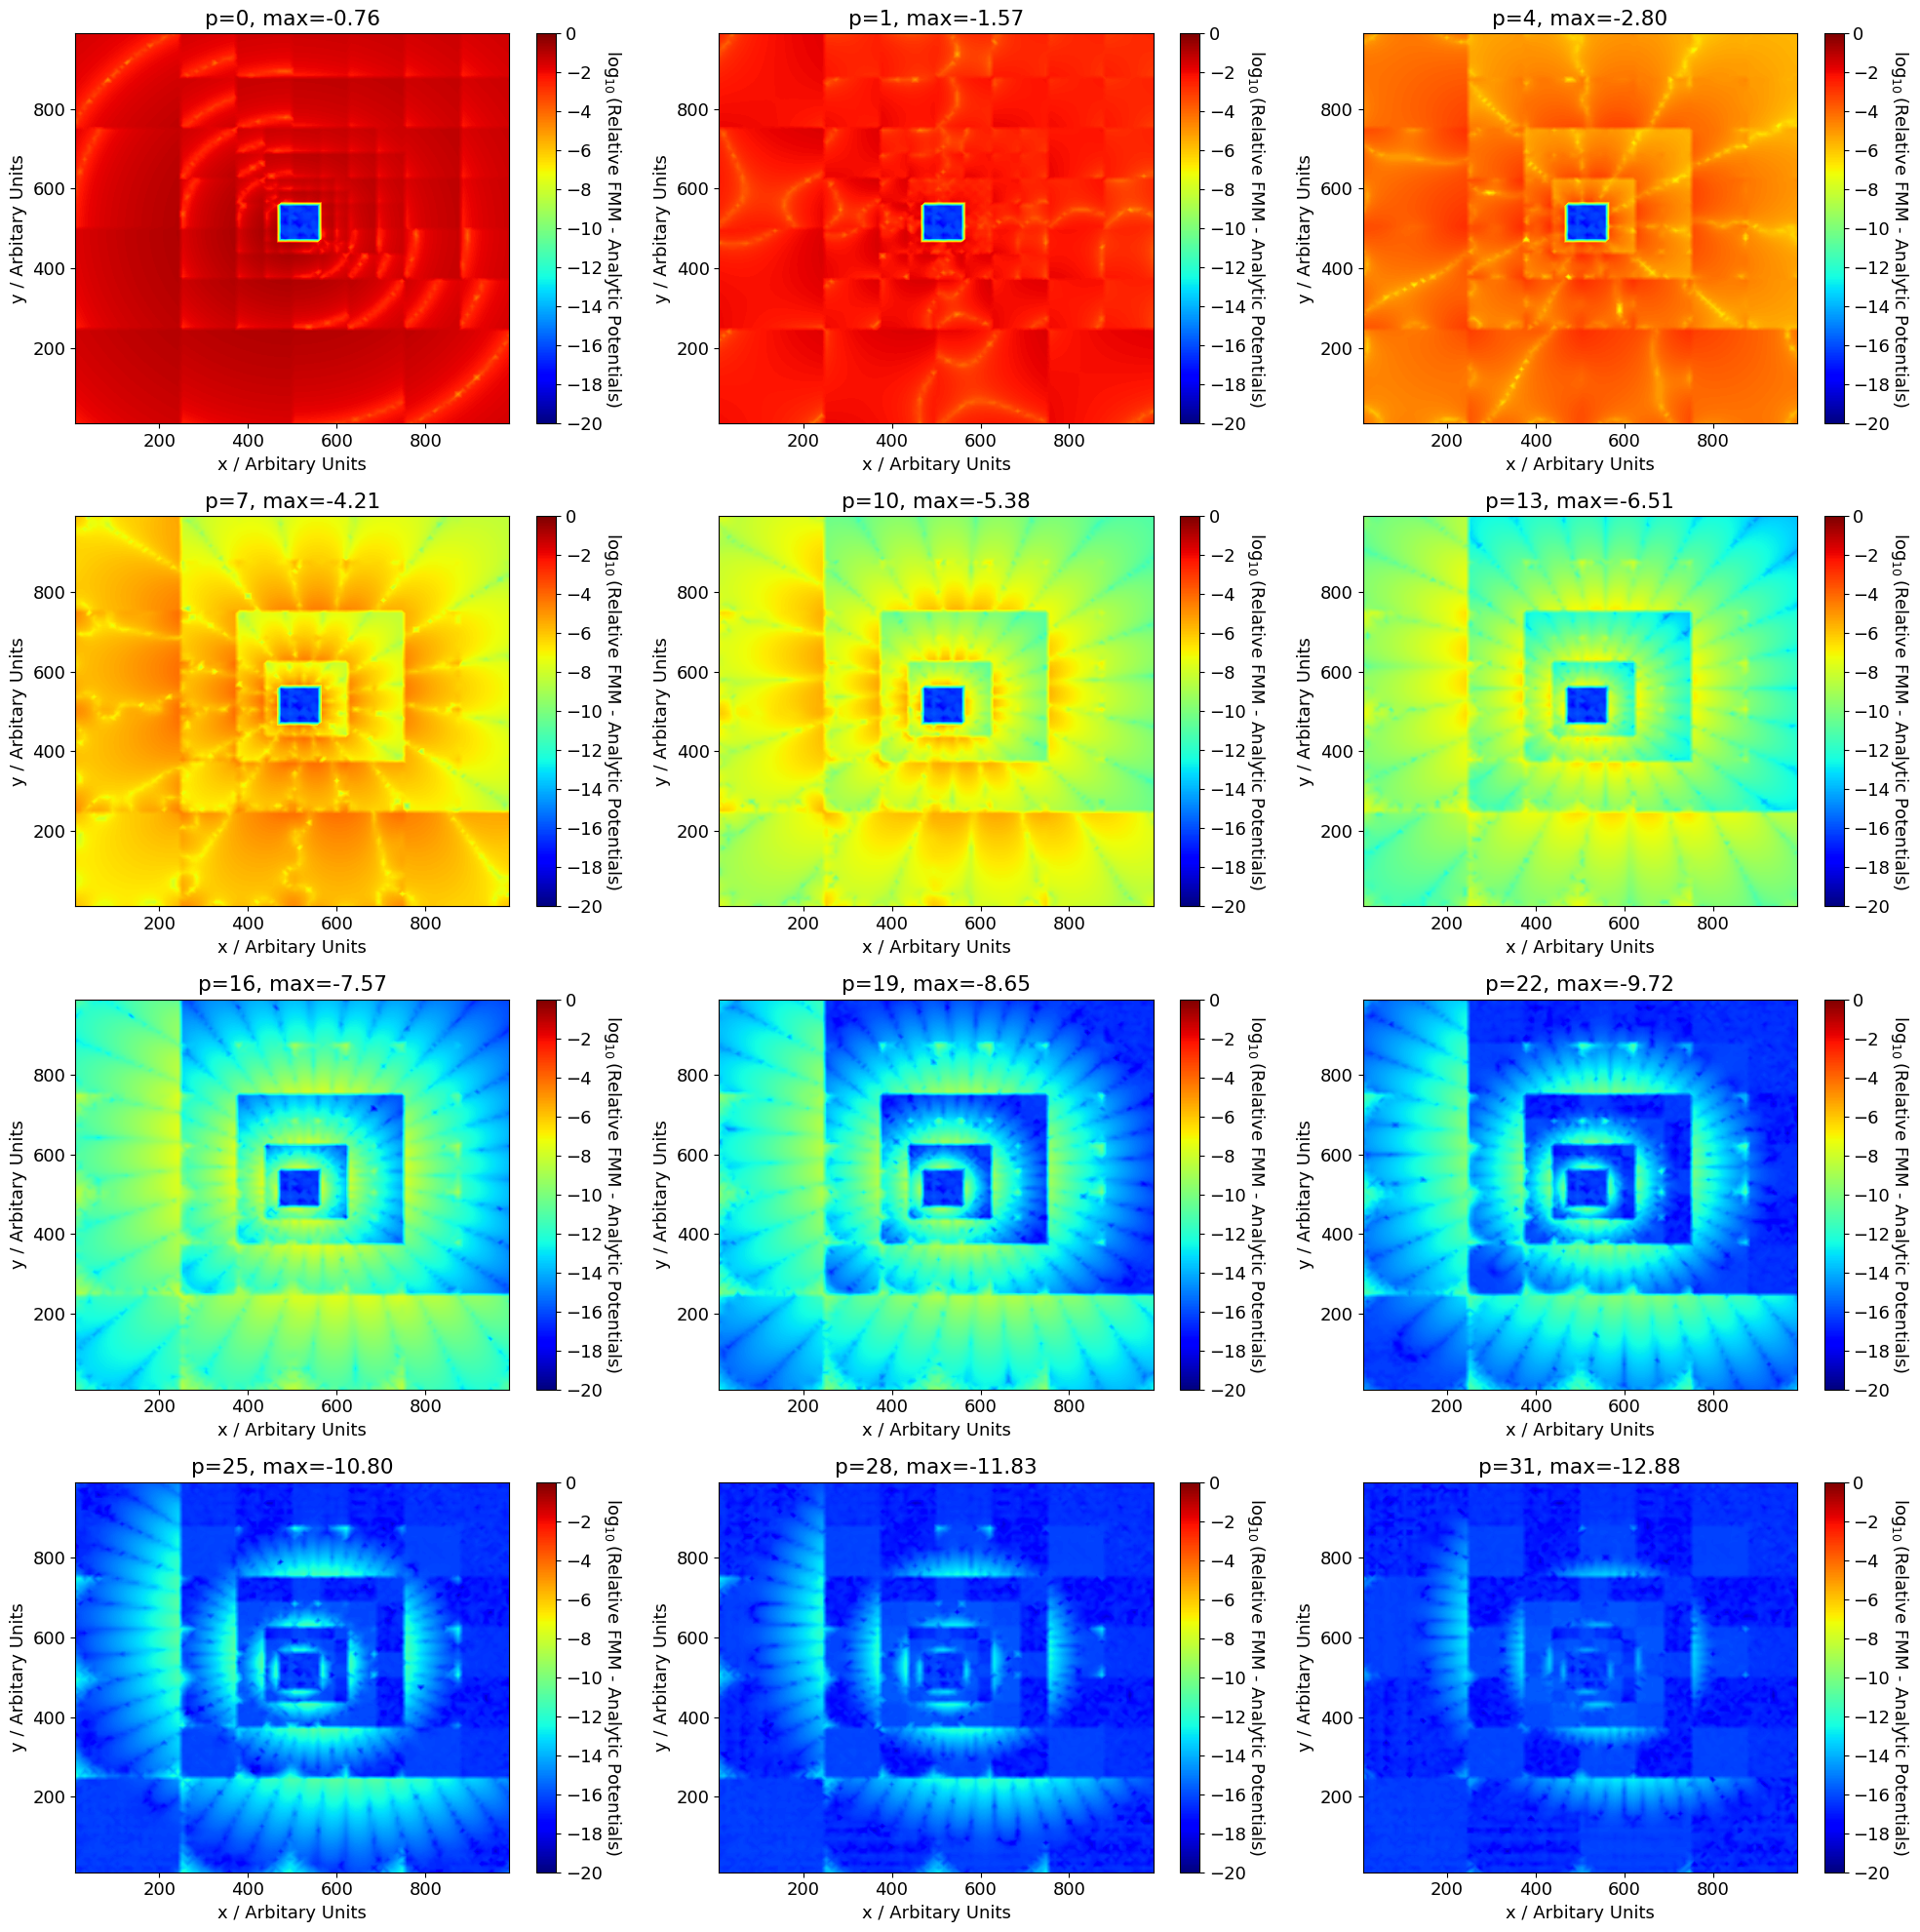

In [17]:
# Calculate the multiple expansion about the finest level meshbox which
# contins the charged particle, and the mpe about the level 2 meshbox
# which also contains the particle. Also compute the FMM potential prediction
# Repeat this for a range of p values
mpe_high_errors_fig, mpe_high_errors_axs = plt.subplots(4,3)
mpe_low_errors_fig, mpe_low_errors_axs = plt.subplots(4,3)
fmm_errors_fig, fmm_errors_axs = plt.subplots(4,3)
analytic_results = util.calc_potential_results(analytic_particles, plotting=False)
plt.rcParams.update({'font.size': 13})
i=0
for p in ([0] + list(range(1,34,3))):
    
    print("p=",p)
    expansion_order = p
    n_levels = 5 # always use 5 levels of multipole expansion
    # generate FMM results
    fmm_particles = copy.deepcopy(initial_particles)
    fmm_simulation = FMM(box_size, fmm_particles, n_levels, p=expansion_order)
    fmm_results = fmm_simulation.run(plotting = False)
    log_fmm_analytic_diff_results = util.calc_log_relative_error_results(fmm_particles, analytic_particles, 
                                                                         fig = fmm_errors_fig, ax = fmm_errors_axs[int(i/3),int(i%3)], 
                                                                         z_range=[-20,0], z_label=r"$\log_{10}(\text{Relative FMM - Analytic Potentials})$")
    log_fmm_analytic_diff_results.ax.set_title("p=" + str(p) + ", max=" + '{0:.2f}'.format(log_fmm_analytic_diff_results.max))
    
    # generate coarse mpe results
    mpe_high_particles = copy.deepcopy(initial_particles)
    mpe_high_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
    mpe_high_test = PointTesting(mpe_high_particles, mpe_high_meshbox)
    mpe_high_test.test_mpe()
    log_mpe_high_test_analytic_diff_results = util.calc_log_relative_error_results(mpe_high_particles, analytic_particles, fig = mpe_high_errors_fig, 
                                                                                   ax = mpe_high_errors_axs[int(i/3),int(i%3)], z_range=[-20,0], 
                                                                                   title = "p = " + str(p), z_label=r"$\log_{10}(\text{Relative Multipole - Analytic Potentials})$")

    # generate fine mpe results
    mpe_low_particles = copy.deepcopy(initial_particles)
    mpe_low_meshbox = fmm_simulation.mesh.meshboxes[5][16][16]
    mpe_low_test = PointTesting(mpe_low_particles, mpe_low_meshbox)
    mpe_low_test.test_mpe()
    log_mpe_low_test_analytic_diff_results = util.calc_log_relative_error_results(mpe_low_particles, analytic_particles, fig = mpe_low_errors_fig, 
                                                                                  ax = mpe_low_errors_axs[int(i/3),int(i%3)], z_range=[-20,0], 
                                                                                  title = "p = " + str(p), z_label=r"$\log_{10}(\text{Relative Multipole - Analytic Potentials})$")
    i+=1
mpe_high_errors_fig.set_size_inches(20, 20)
mpe_high_errors_fig.tight_layout()
mpe_low_errors_fig.set_size_inches(20, 20)
mpe_low_errors_fig.tight_layout()
fmm_errors_fig.set_size_inches(20, 20)
fmm_errors_fig.tight_layout()

